# I. Dimensional Reduction: #

## 1) PCA (Principal Component Analysis): ##
<ul>
<li>Linear dimensionality reduction using singular value decomposition of the data to project it to a lower dimensional space.</li>
<li> Statistical procedure that utilise orthogonal transformation technology.</li>
<li> Convert possible correlated features (predictors) into linearly incorrelated features (predictors) called <b>Principal Components</b>.</li>
<li>Number of principal compnents <= number of features. </li>
<li>First principal component explains the largest possible variance.</li>
<li>Each subsequent component has the highest variance subject to the restriction that it must be orthogonal to the preceding components.</li>
<li> A collection of the components is called Vectors.</li>
<li> Sensitive to scaling.</li>
<li> Component axes that maximise the variance.</li>
</ul>

## 2) LDA (Linear Discriminant Analysis): ##

<ul><li> Most commonly used as dimensionality reduction technique in the pre-processing step for pattern classification an ML applications.</li>
<li> The goal is to project a dataset onto a lower dimensional space with a good class separability in order to avoid overfitting('curse of dimensionality') and also reduce computing costs.</li>
<li> Locate the boundaries around clusters of classes.</li>
<li> Projects datapoints on a line.</li>
<li> A centroid will be allocated to each cluster or have a centroid nearby.</li>
<li> Maximizing the component axes for class separation.</li></ul>

## 3) Other Dimensionality Reduction Techniques: ##

<ul><li> <b>Multidimensional scaling (MDS): </b>seek a low dimensional representation of the data in which the distances respect well the distances in the original high dimensional space.</li>
<li>  <b>Isometric Mapping (Isomap):</b> Seeks a lower dimensional embedding which maintains geodesic distances between all points.  </li>
<li> <b>t Distributed Stochastic neighbour Embedding (t-SNE): </b> 
<ul><li> Non linear dimensionality reduction technique that is particularly suited for embedding high dimensional data into a space of 2 or 3 dimensions, which can be visulized in a scatter plot.</li>
<li>Models each high dimensional object by a 2 or 3 dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points. Dimensional space (example: visulatizing the MNIST images in 2D).</li>
</ul>
</ul>

### Underfitting ###

A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data, i.e., it only performs well on training data but performs poorly on testing data. <br>
Reasons for Underfitting:
<ul>
<li>    High bias and low variance. </li>
<li>    The size of the training dataset used is not enough. </li>
<li>    The model is too simple. </li>
<li>    Training data is not cleaned and also contains noise in it. </li>
</ul>
Techniques to Reduce Underfitting
<ul>
<li>     Increase model complexity. </li>
<li>     Increase the number of features, performing feature engineering. </li>
<li>     Remove noise from the data. </li>
<li>     Increase the number of epochs or increase the duration of training to get better results. </li>
</ul>

### Overfitting ###
A statistical model is said to be overfitted when the model does not make accurate predictions on testing data. When a model gets trained with so much data, it starts learning from the noise and inaccurate data entries in our data set. And when testing with test data results in High variance. <br>
Reasons for Overfitting:
<ul>
<li>     High variance and low bias. </li>
<li>    The model is too complex. </li>
<li>    The size of the training data. </li>
</ul>
Techniques to Reduce Overfitting
<ul>
<li>    Increase training data. </li>
<li>    Reduce model complexity. </li>
<li>    Early stopping during the training phase (have an eye over the loss over the training period as soon as loss begins to increase stop training). </li>
<li>    Ridge Regularization and Lasso Regularization. </li>
<li>    Use dropout for neural networks to tackle overfitting. </li>
</ul>


### linear algebra revision: ###

$$ AXB={\left\lbrack \matrix{1 & 2 \cr 10 & 20} \right\rbrack} 
X \left\lbrack \matrix{1 & 2 \cr 100 & 200} \right\rbrack $$
$$ AXB= \left\lbrack \matrix{1.1+2.100 & 1.2+2.200 \cr 10.1+20.100& 10.2+20.200} \right\rbrack
$$


In [ ]:
import numpy as np

A=[[1,2], [10,20]]
B=[[1,2],[100,200]]
np.dot(A,B)


# II. PCA (Linear): #
Note that:
<ul>
<li>Used in exploratory data analysis (EDA).</li>
<li>Visualize genetic distance and relatedness between populations.</li>
<li>Method: 
<ul><li>Eigenvalue decomposition of a data covariance (or correlation) matrix.</li>
<li>Singular value decomposition of a data matrix (Ater mean centering / normalizing) the data matrix for each attribute.</li>
</ul>
<li>Output: <ul><li>component scores, sometimes called factor scores (the transformed variable values).
<li>loadings (the weight).</li></ul>
<li>Data Compression and information preservation.</li>
<li>  Visualization. </li>
<li> Noise filtering. </li>
<li> Feature extraction and engineering. </li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import sys
import matplotlib

print('python:',sys.version)
print('Numpy:',np.__version__)
print('Pandas:',pd.__version__)
print('Scikitlearn:',sklearn.__version__)
print('Seaborn: ',sns.__version__)
print('matplotlib:',matplotlib.__version__)


python: 3.9.17 (main, Jul  5 2023, 21:22:06) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.22.3
Pandas: 1.5.3
Scikitlearn: 1.2.2
Seaborn:  0.12.2
matplotlib: 3.7.1


## 1) Exercice ##

In [ ]:
rnd_num=np.random.RandomState(42)
X=np.dot(rnd_num.rand(2,2), rnd_num.rand(2,500)).T
X.shape


In [ ]:
X[:, 0]=-X[:,0]
plt.scatter(X[:, 0], X[:,1])
plt.axis('equal')
plt.show()


### Principal Component Identification ###

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(X)


In [ ]:
pca.components_, pca.explained_variance_, pca.explained_variance_ratio_


### Data Plot: ###

In [ ]:
for k,v in zip (pca.explained_variance_,pca.components_):
    vec=v*3*np.sqrt(k)
    ax=plt.gca()
    arrowprops=dict(arrowstyle='<-', linewidth=5, shrinkA=0, shrinkB=0)
    ax.annotate('', pca.mean_,pca.mean_+ vec,arrowprops= arrowprops)
    ax.text(-0.9,1.2,'PC1',ha='center', va='center', rotation=-42, size=12)
    ax.text(-0.1,-0.6,'PC2',ha='center', va='center', rotation=50, size=12)
plt.axis('equal')
plt.show()


In [ ]:
pca.mean_
#pca.mean_+ vec

In [ ]:
## testing
X[:, 0]=-X[:,0]
plt.scatter(X[:, 0], X[:,1])
plt.axis('equal')

for k,v in zip (pca.explained_variance_,pca.components_):
    vec=v*3*np.sqrt(k)
    ax=plt.gca()
    arrowprops=dict(arrowstyle='<-')
    ax.annotate('',pca.mean_,pca.mean_+ vec, arrowprops= arrowprops)
    ax.text(-0.8,0.7,'PC1', rotation=-50, size=12)
    ax.text(-0.6,-0.7,'PC2', rotation=60, size=12)
plt.show()


2 pricipal components
length denotes the significance 
This transformation from data axes is an affine transformation, which basically means is composed of a translation, rotation, and uniform scaling.

### Dimensionality reduction with PCA ###

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=1)
pca.fit(X)
X_pca=pca.transform(X)


In [ ]:
X.shape
X_pca.shape


In [ ]:
X_new=pca.inverse_transform(X_pca)
plt.scatter(X[:, 0],X[:,1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:,1], alpha=0.8)
plt.axis('equal')
print(f'orange is the PCA (1 component)')
plt.show()


# III. Dimentional reduction by extracting principal components: #

In [ ]:
Wine=pd.read_csv(r'Data/Wine.data')
col=np.array(['Class','Alcohol','Malic acid', 'Ash', 'Alcalinity of ash', 
     'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
     'Proanthocyanins', 'Color intensity','Hue','OD280/OD315 of diluted wines',
     'Proline' ])
Wine.columns=col
Wine


In [ ]:
Wine.describe()


In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(Wine.corr(), annot=True, fmt='.3f')


In [ ]:
X=Wine.iloc[:,1:15]
Y=np.array(Wine['Class'])
X


In [ ]:
Wine['Class'].value_counts(dropna=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
Y_test.shape


In [ ]:
sc=StandardScaler()
sc.fit(X_train)
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)
X_test_sc.shape


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=4)
pca.fit(X_train_sc)


In [ ]:
print(np.round(pca.explained_variance_ratio_,3))


In [ ]:
pd.DataFrame(np.round(pca.components_,3),columns=X_train.columns).T


In [ ]:
#not fixing number of components:
pca=PCA(n_components=None)
pca.fit(X_train_sc)
print(np.round(pca.explained_variance_ratio_,3))
pd.DataFrame(np.round(pca.components_,3),columns=X_train.columns)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)


In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('N° of components')
plt.ylabel('Cumulative explained Variance')
plt.show()


In [ ]:
res=pca.transform(X_train_sc)
ind_name=['PCA_'+str(k) for k in range (0,len(res))]
df1=pd.DataFrame(res,columns=X_train.columns, index=ind_name)
df1.T.sort_values(by='PCA_0')


# IV. Kernel PCA: #
Non linear dimensionality reduction throught the use of kernels.<br>
In machine learning, a “kernel” is usually used to refer to the <b>kernel trick:</b> a method of using a linear classifier to solve a non-linear problem. It entails transforming linearly inseparable data like to linearly separable ones . The kernel function is what is applied on each data instance to map the original non-linear observations into a higher-dimensional space in which they become separable.

In [2]:
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA

np.random.seed(0)
X,Y=make_circles(n_samples=100, factor=0.3, noise=0.05)
kpca=KernelPCA(kernel='rbf', fit_inverse_transform=True ,gamma=10)
X_kpca=kpca.fit_transform(X)
X_back=kpca.inverse_transform(X_kpca)


In [10]:
pca=PCA(n_components=None)
X_pca=pca.fit_transform(X)
X_kpca
X_pca.shape


(100, 2)

### Normal Plot : ###

Text(0, 0.5, '$x_2$')

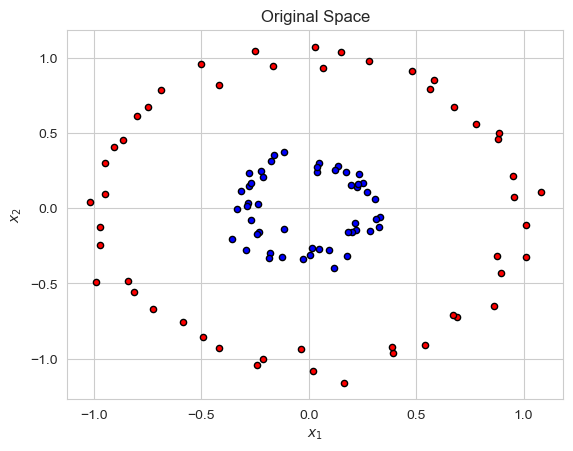

In [11]:
plt.figure()
plt.title('Original Space')
reds=Y==0
blues=Y==1
plt.scatter(X[reds,0], X[reds,1], c='Red',s=20, edgecolor='k')
plt.scatter(X[blues,0], X[blues,1], c='Blue',s=20, edgecolor='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


### PCA Plot : ###

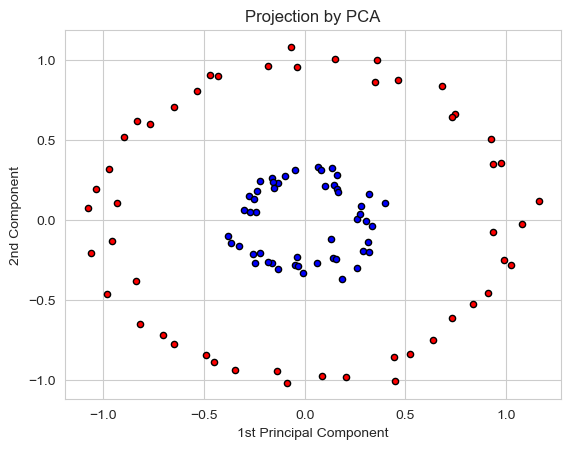

In [12]:

plt.scatter(X_pca[reds,0], X_pca[reds,1], c='Red',s=20, edgecolor='k')
plt.scatter(X_pca[blues,0], X_pca[blues,1], c='Blue',s=20, edgecolor='k')
plt.title('Projection by PCA')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Component')
plt.show()


### KPCA Plot : ###

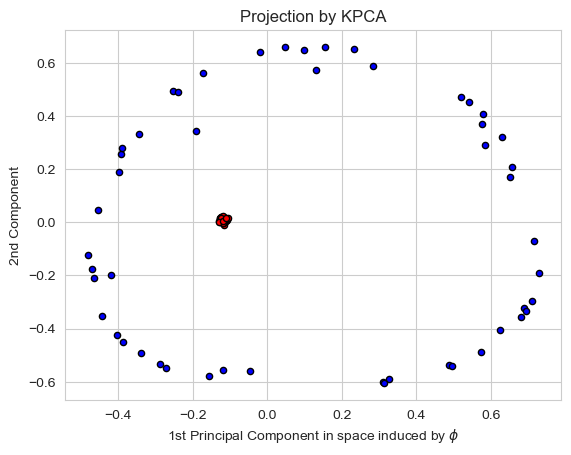

In [15]:
plt.scatter(X_kpca[reds,0], X_kpca[reds,1], c='Red',s=20, edgecolor='k')
plt.scatter(X_kpca[blues,0], X_kpca[blues,1], c='Blue',s=20, edgecolor='k')
plt.title('Projection by KPCA')
plt.xlabel('1st Principal Component in space induced by $\phi$')
plt.ylabel('2nd Component')
plt.show()


## 1) Kernel PCA Example: ##

In [20]:
Iris=sns.load_dataset('iris')
Iris=Iris[Iris['species']!='setosa']
col=['petal_length', 'petal_width']
Iris


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [31]:
X=Iris.loc[:,col]
spec_dict={'versicolor':0, 'virginica':1}
Iris['tmp']=Iris['species'].map(spec_dict)
Y=Iris['tmp']
X


,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [28]:
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA

kpca=KernelPCA(kernel='rbf', n_components=2)
X_kpca=kpca.fit_transform(X)
X_kpca.shape


(100, 2)

In [29]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(solver='lbfgs')
clf.fit(X,Y)


LogisticRegression()

C:\ProgramData\Anaconda3\envs\AI_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


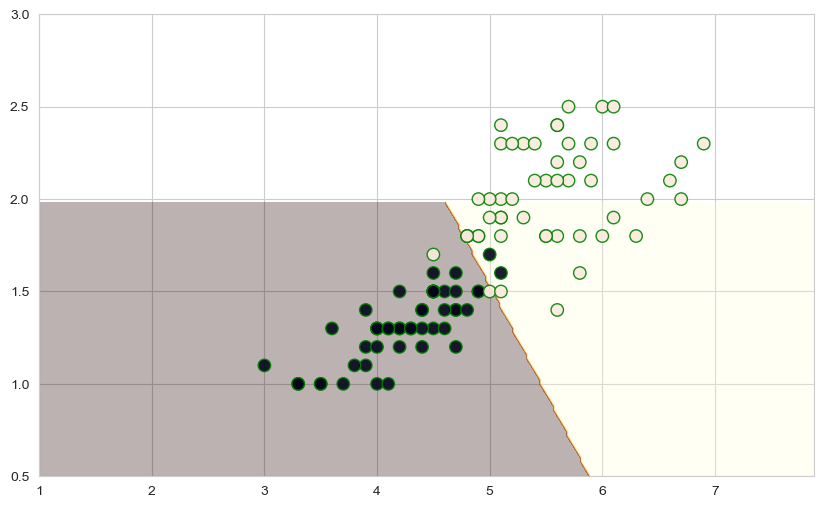

In [37]:
Xv=X.values.reshape(-1,1)
h=0.02
X_min,X_max=Xv.min(),Xv.max()+1
Y_min,Y_max=Y.min(),Y.max()+1
xx,yy=np.meshgrid(np.arange(X_min,X_max,h), np.arange(Y_min,Y_max,h))

z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
fig=plt.figure(figsize=(10,6))
ax=plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0], X.values[:,1],c=Y, s=80,alpha=0.9, edgecolors='g')
plt.ylim((0.5,3))
plt.show()


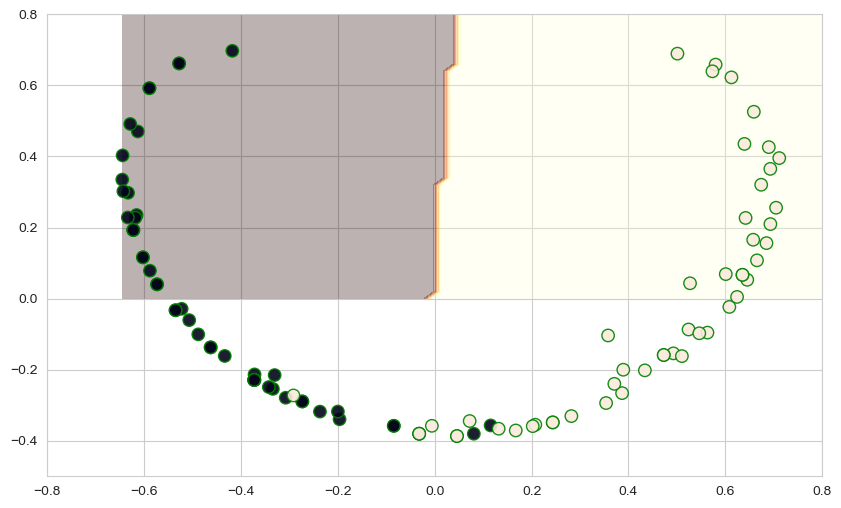

In [45]:
clf.fit(X_kpca,Y)
h=0.02
X_min,X_max=X_kpca.min(),X_kpca.max()+1
Y_min,Y_max=Y.min(),Y.max()+1
xx,yy=np.meshgrid(np.arange(X_min,X_max,h), np.arange(Y_min,Y_max,h))

z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
fig=plt.figure(figsize=(10,6))
ax=plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X_kpca[:,0], X_kpca[:,1],c=Y, s=80,alpha=0.9, edgecolors='g')
plt.xlim((-0.8,0.8))
plt.ylim((-0.5,0.8))
plt.show()


# V. Linear Discriminant Analysis (LDA): #
<ul><li>Supervised dimensionality reduction.</li>
<li>Projects the input data to a linear subspace consisting of the directions which maximize the separation between classes.</li>
<li>Most useful in a multiclass setting.</li>
</ul>


In [49]:
Iris=sns.load_dataset('iris')
Iris=Iris[Iris['species']!='setosa']
col=['petal_length', 'petal_width']

X=Iris.loc[:,col]
spec_dict={'versicolor':0, 'virginica':1}
Iris['tmp']=Iris['species'].map(spec_dict)
Y=Iris['tmp']
X


,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf=LinearDiscriminantAnalysis()
clf.fit(X,Y)


LinearDiscriminantAnalysis()

C:\ProgramData\Anaconda3\envs\AI_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


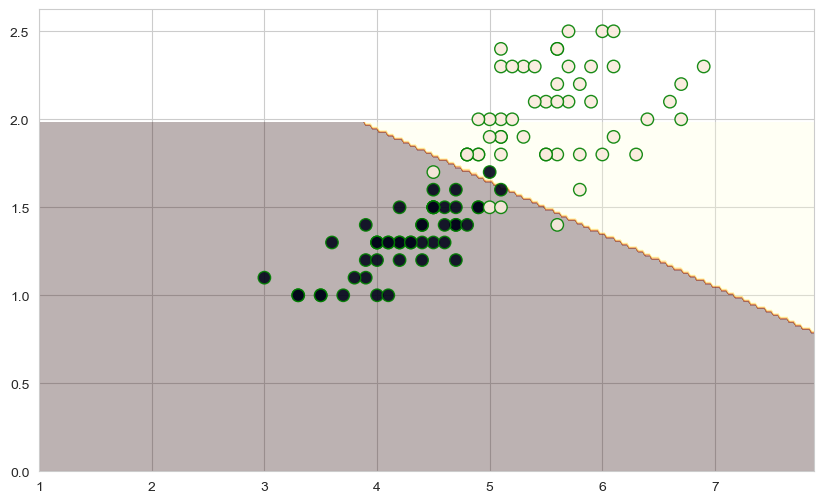

In [61]:
clf.fit(X,Y)
Xv=X.values.reshape(-1,1)
h=0.02
X_min,X_max=Xv.min(),Xv.max()+1
Y_min,Y_max=Y.min(),Y.max()+1
xx,yy=np.meshgrid(np.arange(X_min,X_max,h), np.arange(Y_min,Y_max,h))

z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
fig=plt.figure(figsize=(10,6))
ax=plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0], X.values[:,1],c=Y, s=80,alpha=0.9, edgecolors='g')
plt.show()
